유닛 12 지하철 시간대별 데이터 시각화하기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                   sheet_name=3, encoding='cp949',skiprows=0)
df.shape

(598, 53)

In [53]:
df0 = df.drop(0)# 좌측에 0(index) 이라고 써진 행을 버려라

In [54]:
df0.head(2)
# 5시 시작

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25


출근 시간대에 사람들이 (가장) 많이 타고 내리는 역은 어딜까
- 출근 시간대는 언제인가 : 새벽~오전 9시
- 상위 10개 역 : 정렬해서 큰 수 10개를 자른다(mask 로 조건부 검색)
- 타는 역 / 내리는 역

In [79]:
출근시간시작위치 = 4
출근시간끝위치 = 13
df0 = df0.replace(',', '', regex=True)
arr = np.array(df0)
arr.shape
역이름 = arr[:, 3]
역별승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2].astype(np.int)
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원합[0], 역별하차인원합[0]

(162732, 425823)

In [76]:
k = 10
threshold = np.sort(역별승차인원합)[-k] #기준값
threshold

382801

In [80]:
mask = 역별승차인원합 >= threshold 
역별하차인원합[mask], 역이름[mask]

(array([374685, 150637, 149879, 397532, 221675,  95938,  65515, 110080,
         65234,  52712]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object))

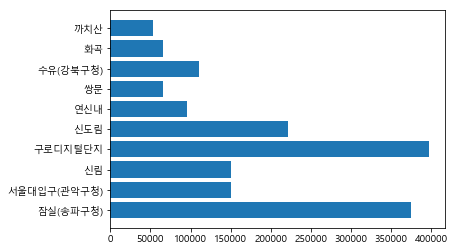

In [82]:
m = plt.rc('font', family='Malgun Gothic')
m = plt.barh(역이름[mask], 역별하차인원합[mask])

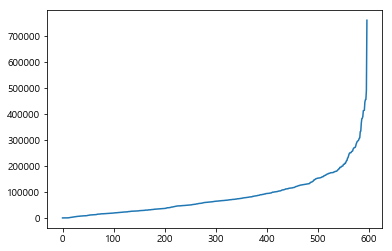

In [70]:
m = plt.plot(np.sort(역별승차인원합))

<BarContainer object of 2 artists>

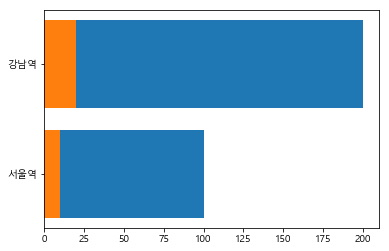

In [60]:
plt.rc('font', family='Malgun Gothic')
plt.barh(['서울역','강남역'], [100, 200])
plt.barh(['서울역','강남역'], [10, 20])